In [34]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [35]:
#loading the dataset
df = pd.read_csv("data\Claims-n-Patients.csv")
df.head()

,claim id,claim date,claim line item,claim status,primary plan payment type,secondary plan payment type,tertiary plan payment type,primary plan name,secondary plan name,tertiary plan name,...,procedure code,treatment code,treatment description,days supply,quantity,patient id,patient year of birth,patient gender source value,product id,product name
0,41439,12/27/2018,1,,Medicare,,,MEDICARE MARYLAND (MD),,,...,71046,71046,"RADIOLOGIC EXAMINATION, CHEST; 2 VIEWS",,,1022234340,1973,M,,
1,98850,9/2/2021,1,,Commercial,,,UNITED HLTHCARE-UNSPECIFIED,,,...,E0260,E0260,"HOSPITAL BED, SEMI-ELECTRIC (HEAD AND FOOT ADJ...",,,1004662074,1949,F,,
2,74412,3/15/2018,3,,Medicare,,,MEDICARE B CALIFORNIA SOUTH (CA),,,...,11056,11056,PARING OR CUTTING OF BENIGN HYPERKERATOTIC LES...,,,1025020871,0,F,,
3,28608,4/13/2019,1,,Medicare Part D,,,UHC MED ADV GENERAL (NJ),,,...,99213,99213,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,,,1027263161,1941,F,,
4,28608,4/13/2019,4,,Medicare Part D,,,UHC MED ADV GENERAL (NJ),,,...,J0696,J0696,"INJECTION, CEFTRIAXONE SODIUM, PER 250 MG",,,1027263161,1941,F,409733801,CEFTRIAXONE SODIUM


In [36]:
#checking the column names
df.columns

Index(['claim id', 'claim date', 'claim line item', 'claim status',
       'primary plan payment type', 'secondary plan payment type',
       'tertiary plan payment type', 'primary plan name',
       'secondary plan name', 'tertiary plan name', 'primary plan type',
       'secondary plan type', 'tertiary plan type', 'reject code',
       'reject reason', 'source claim type', 'referring provider hcp id',
       'rendering provider hcp id', 'diagnosis code 1', 'diagnosis code 2',
       'diagnosis code 3', 'diagnosis code 4', 'diagnosis code 5',
       'diagnosis code 6', 'diagnosis code 7', 'diagnosis code 8', 'ptnt oop',
       'buy down', 'paid by payer', 'service bill amount',
       'service allowed amount', 'out of pocket ask',
       'primary payer pay amount', 'secondary payer pay amount',
       'tertiary payer pay amount', 'product strength',
       'procedure description', 'procedure code', 'treatment code',
       'treatment description', 'days supply', 'quantity', 'patient i

In [37]:
#checking the datatypes
df.dtypes

claim id                        int64
claim date                     object
claim line item                 int64
claim status                   object
primary plan payment type      object
secondary plan payment type    object
tertiary plan payment type     object
primary plan name              object
secondary plan name            object
tertiary plan name             object
primary plan type              object
secondary plan type            object
tertiary plan type             object
reject code                    object
reject reason                  object
source claim type              object
referring provider hcp id      object
rendering provider hcp id      object
diagnosis code 1               object
diagnosis code 2               object
diagnosis code 3               object
diagnosis code 4               object
diagnosis code 5               object
diagnosis code 6               object
diagnosis code 7               object
diagnosis code 8               object
ptnt oop    

In [38]:
#
df['claim date'] = pd.to_datetime(df['claim date'])
df['claim date'].dtype
df.head()

,claim id,claim date,claim line item,claim status,primary plan payment type,secondary plan payment type,tertiary plan payment type,primary plan name,secondary plan name,tertiary plan name,...,procedure code,treatment code,treatment description,days supply,quantity,patient id,patient year of birth,patient gender source value,product id,product name
0,41439,2018-12-27,1,,Medicare,,,MEDICARE MARYLAND (MD),,,...,71046,71046,"RADIOLOGIC EXAMINATION, CHEST; 2 VIEWS",,,1022234340,1973,M,,
1,98850,2021-09-02,1,,Commercial,,,UNITED HLTHCARE-UNSPECIFIED,,,...,E0260,E0260,"HOSPITAL BED, SEMI-ELECTRIC (HEAD AND FOOT ADJ...",,,1004662074,1949,F,,
2,74412,2018-03-15,3,,Medicare,,,MEDICARE B CALIFORNIA SOUTH (CA),,,...,11056,11056,PARING OR CUTTING OF BENIGN HYPERKERATOTIC LES...,,,1025020871,0,F,,
3,28608,2019-04-13,1,,Medicare Part D,,,UHC MED ADV GENERAL (NJ),,,...,99213,99213,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,,,1027263161,1941,F,,
4,28608,2019-04-13,4,,Medicare Part D,,,UHC MED ADV GENERAL (NJ),,,...,J0696,J0696,"INJECTION, CEFTRIAXONE SODIUM, PER 250 MG",,,1027263161,1941,F,409733801,CEFTRIAXONE SODIUM


In [39]:
#extracting the years
df['claim date'] = df['claim date'].dt.year
df.head()

,claim id,claim date,claim line item,claim status,primary plan payment type,secondary plan payment type,tertiary plan payment type,primary plan name,secondary plan name,tertiary plan name,...,procedure code,treatment code,treatment description,days supply,quantity,patient id,patient year of birth,patient gender source value,product id,product name
0,41439,2018,1,,Medicare,,,MEDICARE MARYLAND (MD),,,...,71046,71046,"RADIOLOGIC EXAMINATION, CHEST; 2 VIEWS",,,1022234340,1973,M,,
1,98850,2021,1,,Commercial,,,UNITED HLTHCARE-UNSPECIFIED,,,...,E0260,E0260,"HOSPITAL BED, SEMI-ELECTRIC (HEAD AND FOOT ADJ...",,,1004662074,1949,F,,
2,74412,2018,3,,Medicare,,,MEDICARE B CALIFORNIA SOUTH (CA),,,...,11056,11056,PARING OR CUTTING OF BENIGN HYPERKERATOTIC LES...,,,1025020871,0,F,,
3,28608,2019,1,,Medicare Part D,,,UHC MED ADV GENERAL (NJ),,,...,99213,99213,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,,,1027263161,1941,F,,
4,28608,2019,4,,Medicare Part D,,,UHC MED ADV GENERAL (NJ),,,...,J0696,J0696,"INJECTION, CEFTRIAXONE SODIUM, PER 250 MG",,,1027263161,1941,F,409733801,CEFTRIAXONE SODIUM


In [40]:
#grouping medical payment plans and year in ascending order
grouped_df = df.groupby(['primary plan payment type', 'claim date']).size().reset_index(name = 'counts')
sorted_df = grouped_df.sort_values(by=['claim date'], ascending=True)
sorted_df.head()

,primary plan payment type,claim date,counts
0,Commercial,2018,112
15,Medicare Part D,2018,8
21,Mgd Medicaid,2018,40
6,FFS Medicaid,2018,3
9,Medicare,2018,160


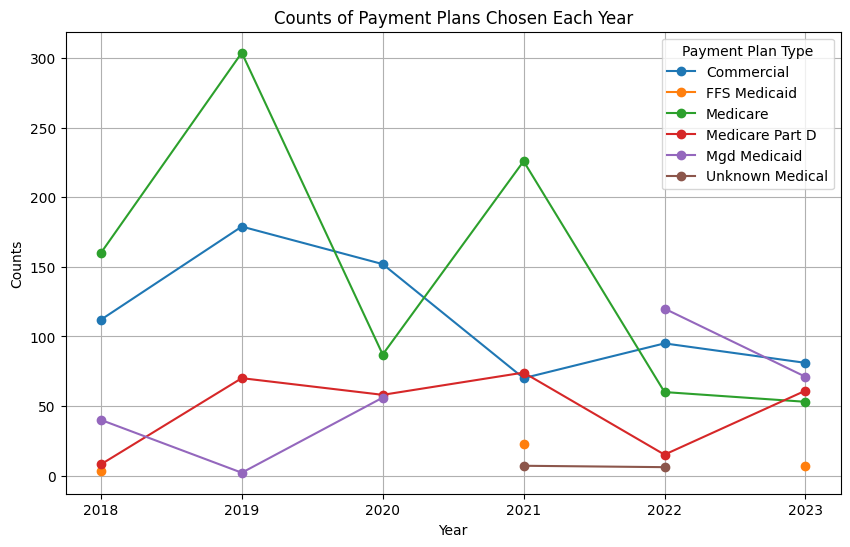

In [42]:
# Pivot the DataFrame to make 'Payment_Plan_Type' as columns
pivot_df = sorted_df.pivot(index='claim date', columns='primary plan payment type', values='counts')

# Plot the counts for each payment plan type over the years
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Customize the plot
plt.title('Counts of Payment Plans Chosen Each Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.grid(True)
plt.legend(title='Payment Plan Type')
plt.show()